In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import ROOT as r

Welcome to JupyROOT 6.26/06


In [2]:
remake_pdf_plot  = False
remake_root_file = False

In [3]:
# Need to strip off the leading and trailing curly bracket
# Also in some cases "*^" is there instead of "e" for an exponent
# Also skip lines starting with "#'
# Store in a temporary file
def cleanupFile(fileToClean):
    outFile = open("temp.txt","w")
    with open(fileToClean, 'r') as f:
        for line in f:
            if "#" != line[0]:
                l = line.replace("{","")
                l = l.replace("}","")
                l = l.replace("*^","e")
                outFile.write(l)
    outFile.close()

In [4]:
# File names
fnames = ['jpsi_below_8GeV.txt',
          'psiprime_below_8GeV.txt',
          'jpsi_6GeV_and_up.txt',
          'psiprime_6GeV_and_up.txt']
# list to store the data
data = []

In [5]:
# Loop over files 
for f in fnames:
    cleanupFile(f)
    d = np.loadtxt("temp.txt", delimiter=',')
    data.append(d.copy())
    os.remove("temp.txt")

In [6]:
# store pt, dn, up, cen
ptList  = []
upList  = []
cenList = []
dnList  = []
for i in range(4):
    pt = (data[i])[:,0]
    dn = (data[i])[:,1]
    if i > 1:
        cen = (data[i])[:,2]
        up  = (data[i])[:,3]
    else:
        up  = (data[i])[:,2]
        cen = 0.5 * (up+dn)
    
    if i < 2:
        up  = 1.2*up
        cen = 1.2*cen
        dn  = 1.2*dn
        
    ptList.append(pt)
    upList.append(up)
    dnList.append(dn)
    cenList.append(cen)

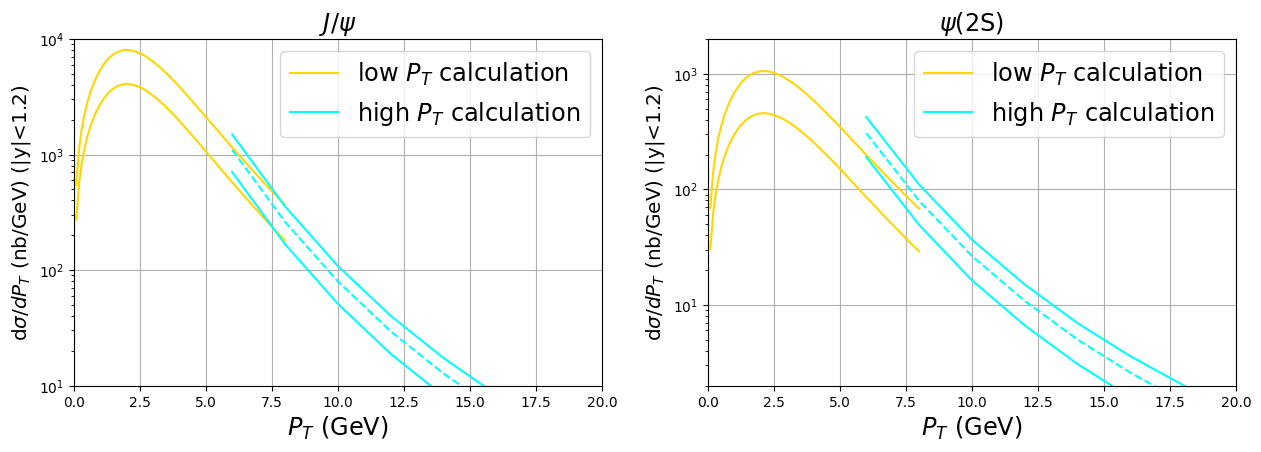

In [7]:
def make_plot(combo=False, eta=False):
    plt.figure(figsize=(15,4.5))
    sample = ['psi', 'psiprim']
    ltyp = 'dotted'
    if eta: 
        ltyp = 'solid'
    ipl = 0
    ipl = ipl + 1
    ax = plt.subplot(120+ipl)
    pt = ptList[0]
    if not eta:
        ax.plot(ptList[0], dnList[0], color='gold', label="low $P_T$ calculation")
        ax.plot(ptList[0], upList[0], color='gold')
        ax.plot(ptList[2], dnList[2], color='cyan', label="high $P_T$ calculation")
        ax.plot(ptList[2], upList[2], color='cyan')
    if combo:
        ax.plot(ptJpsi, dnJpsi, color='black', linestyle=ltyp, label="Combination")
        ax.plot(ptJpsi, upJpsi, color='black', linestyle=ltyp)
        if eta:
            ax.plot(ptJpsi, cnJpsi, color='black', linestyle=ltyp)
    else:
        if not eta:
            ax.plot(ptList[2], cenList[2], color='cyan', linestyle='dashed')
    ax.set_yscale('log')
        
    ax.set_xlim(0,20)
    ax.set_ylim(10,1e4)
    ax.grid()
    ax.set_title("$J/\psi$", fontsize='xx-large')
    ax.set_xlabel('$P_T$ (GeV)', fontsize='xx-large')
    if eta:
        ax.set_ylabel('d$\sigma/dP_T$ (nb/GeV) (|y|<1.2) \nrescaled to $\eta$=0.11', 
                      fontsize='x-large')
    else:
        ax.set_ylabel('d$\sigma/dP_T$ (nb/GeV) (|y|<1.2)', fontsize='x-large')
    ax.legend(fontsize='xx-large')

    ipl = ipl + 1
    ax = plt.subplot(120+ipl)
    pt = ptList[1]
    if not eta:
        ax.plot(ptList[1], dnList[1], color='gold', label="low $P_T$ calculation")
        ax.plot(ptList[1], upList[1], color='gold')
        ax.plot(ptList[3], dnList[3], color='cyan',  label="high $P_T$ calculation")
        ax.plot(ptList[3], upList[3], color='cyan')
    if combo:
        ax.plot(ptPsiprime, dnPsiprime, color='black', 
                linestyle=ltyp, label="Combination")
        ax.plot(ptPsiprime, upPsiprime, color='black', linestyle=ltyp)
        if eta:
            ax.plot(ptPsiprime, cnPsiprime, color='black', linestyle=ltyp)
    else:
        if not eta:
            ax.plot(ptList[3], cenList[3], color='cyan', linestyle='dashed')
    ax.set_yscale('log')
    ax.set_xlim(0,20)
    ax.set_ylim(2,2e3)
    ax.grid()
    ax.set_title("$\psi$(2S)", fontsize='xx-large')
    ax.set_xlabel('$P_T$ (GeV)', fontsize='xx-large')
    if eta:
        ax.set_ylabel('d$\sigma/dP_T$ (nb/GeV) (|y|<1.2) \nrescaled to $\eta$=0.11', 
                      fontsize='x-large')
    else:
        ax.set_ylabel('d$\sigma/dP_T$ (nb/GeV) (|y|<1.2)', fontsize='x-large')
    ax.legend(fontsize='xx-large')
    return
make_plot()

In [8]:
# make the high pt also in fine bins, and replace the contents lists
dpt = 0.1
i = 2
for pt,up,dn,cen in zip(ptList[2:],upList[2:],dnList[2:],cenList[2:]):
    fine_pt = np.arange(pt[0], pt[-1]+1e-6, dpt)
    fine_dn = np.exp(np.interp(fine_pt, pt, np.log(dn)))
    fine_cn = np.exp(np.interp(fine_pt, pt, np.log(cen)))
    fine_up = np.exp(np.interp(fine_pt, pt, np.log(up)))
    fine_pt = np.round(fine_pt, 1)
    ptList[i]  = fine_pt
    upList[i]  = fine_up
    dnList[i]  = fine_dn
    cenList[i] = fine_cn
    i = i + 1
# Sanity check
for i in range(4):
    qt = ptList[i]
    print(len(ptList[i]), qt[1]-qt[0])

80 0.1
80 0.1
1141 0.09999999999999964
1141 0.09999999999999964


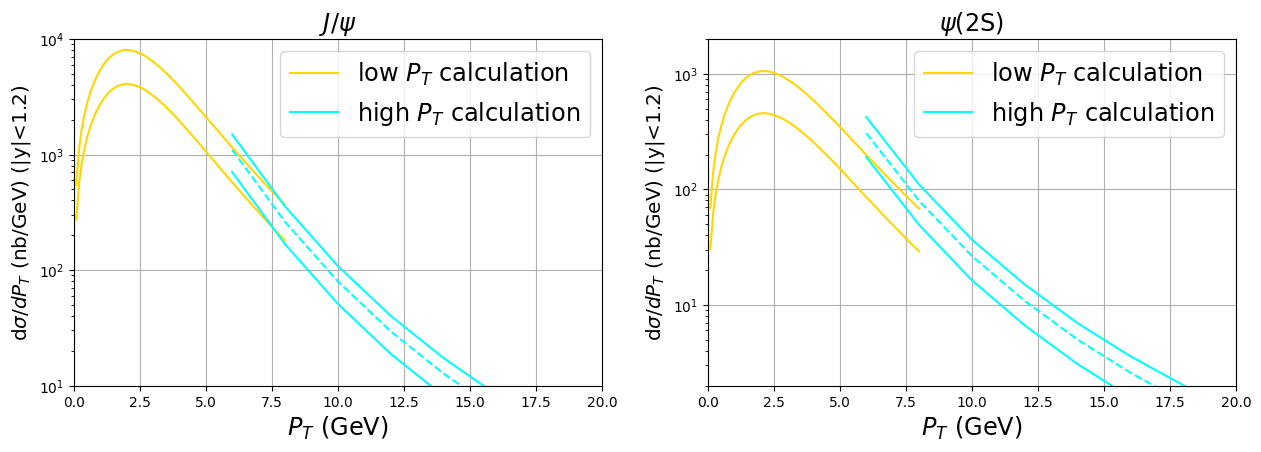

In [9]:
# Make sure that we can get the same plot as before
make_plot()

In [10]:
# append N entries to an array with values = v
def findValue(pt, ptArr1, arr1, ptArr2, arr2):
    dpt1 = np.abs(pt-ptArr1)
    dpt2 = np.abs(pt-ptArr2)
    i1 = np.where(dpt1<0.01)[0]
    i2 = np.where(dpt2<0.01)[0]
    return arr1[i1][0], arr2[i2][0]

In [11]:
# We will just expand the error bands
for k in range(2):
    iL = 0+k # low pt 
    iH = 2+k # high pt

    # The pt, down, and up for the low guys
    ptL = ptList[iL]
    dnL = dnList[iL]
    upL = upList[iL]

    # The pt, down, and up for the high guys
    ptH = ptList[iH]
    dnH = dnList[iH]
    upH = upList[iH]

    # The region of overlap
    pt1 = ptH[0]
    pt2 = ptL[-1]
    print(pt1,pt2)

    # where to store the new variables
    newPt = []
    newUp = []
    newDn = []

    # kludges 
    if k == 1:
        d1, d2 = findValue(pt1, ptL, upL, ptH, upH)
        klup = max(d1,d2)
        d1, d2 = findValue(pt2, ptL, dnL, ptH, dnH)
        kldn = min(d1,d2)
    else:
        d1, d2 = findValue(pt1, ptL, upL, ptH, upH)
        klup = max(d1,d2)
        
    
    pt = 0.
    jL = 0
    jH = 0
    while pt+0.01 < ptH[-1]:
        pt = pt + 0.1
        if pt+0.001 < pt1:
            newPt.append(ptL[jL])
            newDn.append(dnL[jL])
            if klup>upL[jL] and pt>2.5:
                newUp.append(klup)
            else:
                newUp.append(upL[jL])
            jL = jL+1
        elif pt-0.001 > pt2:
            newPt.append(ptH[jH])
            newUp.append(upH[jH])
            if k==1 and kldn < dnH[jH]:
                newDn.append(kldn)
            else:
                newDn.append(dnH[jH])
            jH = jH+1
        else:
            # print(pt)
            newPt.append(ptH[jH])
            d1,d2 = findValue(pt, ptL, upL, ptH, upH)
            newUp.append(max(d1,d2))
            d1,d2 = findValue(pt, ptL, dnL, ptH, dnH)
            newDn.append(min(d1,d2))
            jH = jH+1

    if k == 0:
        ptJpsi = np.array(newPt)
        upJpsi = np.array(newUp)
        dnJpsi = np.array(newDn)
        cnJpsi = (upJpsi+dnJpsi)/2.
    else:
        ptPsiprime = np.array(newPt)
        upPsiprime = np.array(newUp)
        dnPsiprime = np.array(newDn)
        cnPsiprime = (upPsiprime+dnPsiprime)/2.
        

6.0 8.0
6.0 8.0


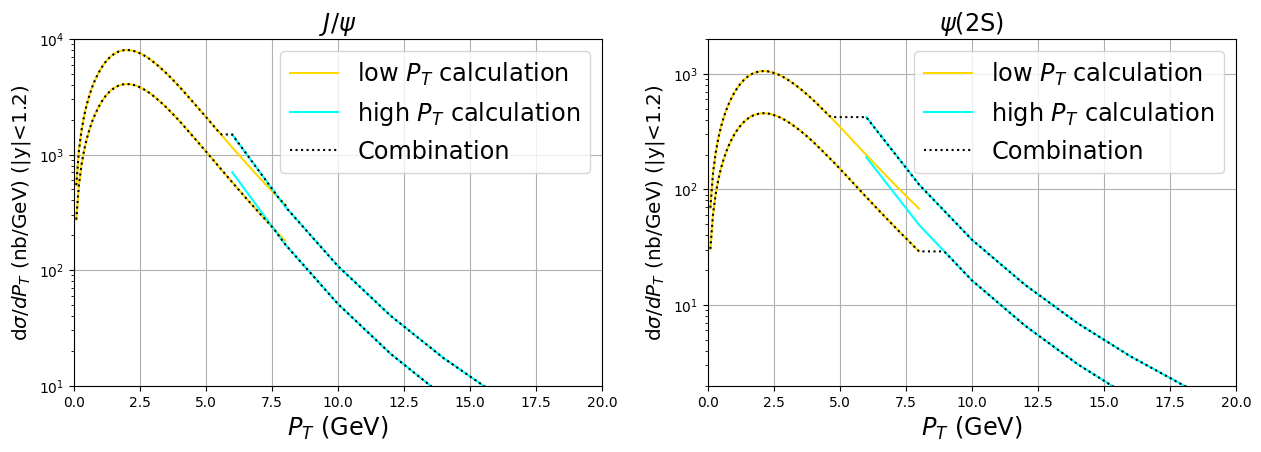

In [12]:
make_plot(True)
if remake_pdf_plot:
    plt.savefig("charmonium_run3.pdf")

In [13]:
def yVsEta(eta, m, pt):
    temp = np.sqrt(m*m+pt*pt*np.cosh(eta)*np.cosh(eta))
    temp = temp + pt*np.sinh(eta)
    temp = temp/np.sqrt(m*m+pt*pt)
    return np.log(temp)
    

def dYdEta(eta, m, pt, h=0.01):
    diff = yVsEta(eta+h, m, pt)-yVsEta(eta-h, m, pt)
    return diff/(2*h)

In [14]:
# Multiply by dy/deta at eta = 0.11
jpsiMass      = 3.096916
psiprMass     = 3.68609
scaleJpsi     = dYdEta(0.11, jpsiMass,  ptJpsi)
scalePsiprime = dYdEta(0.11, psiprMass, ptPsiprime)
upJpsi = scaleJpsi * upJpsi
dnJpsi = scaleJpsi * dnJpsi
cnJpsi = scaleJpsi * cnJpsi
upPsiprime = scalePsiprime * upPsiprime
dnPsiprime = scalePsiprime * dnPsiprime 
cnPsiprime = scalePsiprime * cnPsiprime

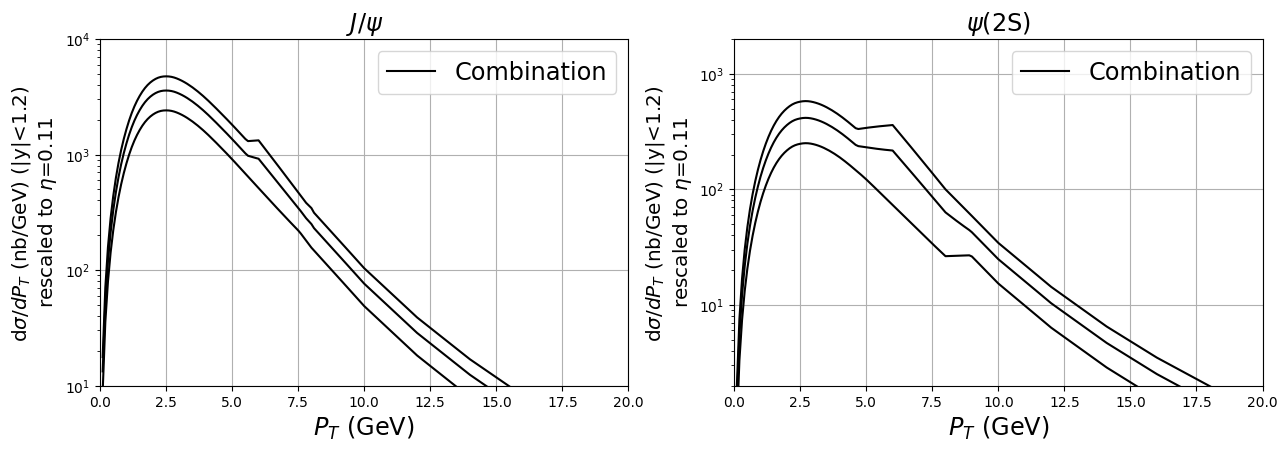

In [15]:
make_plot(True, True)

In [16]:
if remake_root_file:
    cnToRoot = [cnJpsi, cnPsiprime]
    upToRoot = [upJpsi, upPsiprime]
    dnToRoot = [dnJpsi, dnPsiprime]
    rootFile = ["merged_jpsi_run3.root", "merged_psiprime_run3.root"]
    qt       = ptJpsi
    for cn,up,dn,rFile in zip(cnToRoot, upToRoot, dnToRoot, rootFile):
        fout = r.TFile(rFile, "RECREATE")
        minpt = 0.
        maxpt = qt[-1]
        dpt   = 0.5 * (qt[1] - qt[0])
        fine_pt = np.arange(0.0, qt[-1]+1e-6, dpt)
        fine_dn = np.interp(fine_pt, qt, dn)
        fine_cn = np.interp(fine_pt, qt, cn)
        fine_up = np.interp(fine_pt, qt, up)
        nbins = round((maxpt - minpt) / (2*dpt))
        h_dn = r.TH1D("down",    ";p_{T} [GeV];dsigma / dpt [nb/GeV]", nbins, minpt, maxpt)
        h_cn = r.TH1D("central", ";p_{T} [GeV];dsigma / dpt [nb/GeV]", nbins, minpt, maxpt)
        h_up = r.TH1D("up",      ";p_{T} [GeV];dsigma / dpt [nb/GeV]", nbins, minpt, maxpt)
        for i in range(nbins):
            h_dn.SetBinContent(i+1, fine_dn[2*i+1])
            h_cn.SetBinContent(i+1, fine_cn[2*i+1])
            h_up.SetBinContent(i+1, fine_up[2*i+1])
        h_dn.Write()
        h_cn.Write()
        h_up.Write()
        fout.Close()
        
        
        